In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sentence_transformers import SentenceTransformer


# Load data
SEP = "\n----------\n"
filename = "strings"
with open(f"../dj-visualizations/data/{filename}.txt", 'r') as f:
    strings = f.read()

strings = list(set(list(map(lambda x: x.strip("f").strip("\"'").strip(), strings.split(SEP)))))


# Step 1: Generate Embeddings
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(strings, show_progress_bar=True)
embeddings = np.array(embeddings)
print(embeddings.shape)

# Step 2: Reduce Dimensionality with t-SNE
tsne = TSNE(n_components=2)
embeddings_reduced = tsne.fit_transform(embeddings)
print(embeddings_reduced.shape)

# Step 3: Plotting
x_coords = embeddings_reduced[:, 0]
y_coords = embeddings_reduced[:, 1]


/home/dpaul/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Batches: 100%|██████████| 199/199 [00:04<00:00, 45.06it/s]


(6353, 384)
(6353, 2)


Batches: 100%|██████████| 430/430 [00:13<00:00, 32.27it/s]


(13748, 384)
(13748, 2)


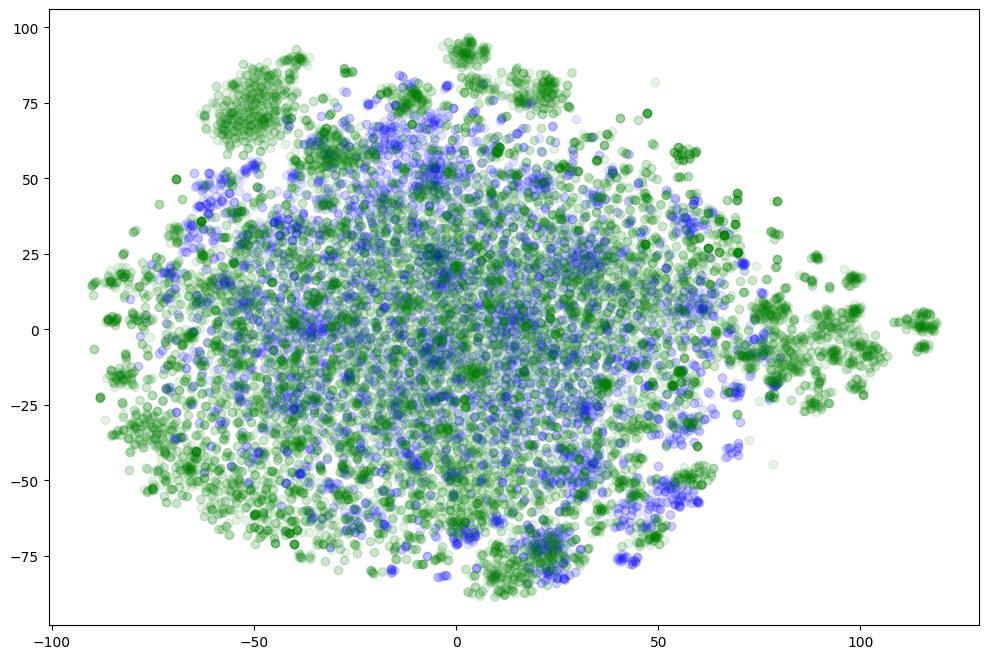

In [2]:
# Generate Embeddings for all prompts in prompts.json
import json
# Load data
filename = "prompts"
with open(f"{filename}.json", 'r') as f:
    prompts = json.load(f)

prompts = prompts["Prompts"]

# Step 1: Generate Embeddings
embeddings = model.encode(prompts, show_progress_bar=True)
embeddings = np.array(embeddings)
print(embeddings.shape)

# Step 2: Reduce Dimensionality with t-SNE
tsne = TSNE(n_components=2)
embeddings_reduced = tsne.fit_transform(embeddings)
print(embeddings_reduced.shape)

# Step 3: Plotting overlaid with different colors
x_coords_prompts = embeddings_reduced[:, 0]
y_coords_prompts = embeddings_reduced[:, 1]
plt.figure(figsize=(12, 8))
plt.scatter(x_coords, y_coords, color="blue", alpha=0.1)
plt.scatter(x_coords_prompts, y_coords_prompts, color="green", alpha=0.1)
plt.show()